In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
url = 'https://raw.githubusercontent.com/ricardoramos12/30daychartchallenge/refs/heads/main/Day22-mobility/uber.csv'
datos = pd.read_csv(url, delimiter=";")

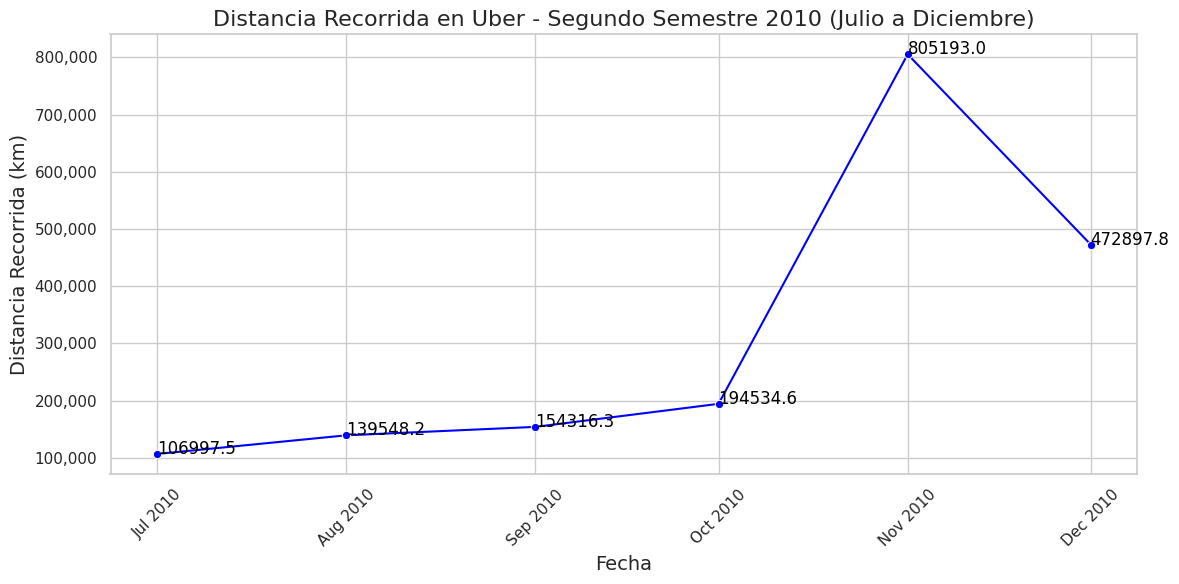

In [38]:
# Convertir la columna 'start_at' a tipo de fecha
datos['start_at'] = pd.to_datetime(datos['start_at'], format='%d/%m/%Y')
datos_semestre = datos[(datos['start_at'].dt.month >= 7) & (datos['start_at'].dt.month <= 12)]
distancia_por_mes = datos_semestre.groupby(datos_semestre['start_at'].dt.to_period('M'))['distancia_km'].sum().reset_index()
distancia_por_mes['start_at'] = distancia_por_mes['start_at'].dt.to_timestamp()
sns.set(style="whitegrid")

# Crear el gráfico de líneas
plt.figure(figsize=(12, 6))
lineplot = sns.lineplot(data=distancia_por_mes, x='start_at', y='distancia_km', marker='o', color='blue')

# Añadir los valores en los puntos de la línea
for x, y in zip(distancia_por_mes['start_at'], distancia_por_mes['distancia_km']):
    lineplot.text(x, y, f'{y:.1f}', horizontalalignment='left', size='medium', color='black')

# Personalizar el gráfico
plt.title('Distancia Recorrida en Uber - Segundo Semestre 2010 (Julio a Diciembre)', fontsize=16)
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Distancia Recorrida (km)', fontsize=14)
plt.xticks(rotation=45)


plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b %Y'))
plt.gca().yaxis.get_major_locator().set_params(integer=True)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.tight_layout()
plt.show()